## Machine Learning Classification: US Census Income

<img src = "17_A_0.PNG" width = 300>

In [28]:
#### Importation des librairies

from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from  sklearn.linear_model import LogisticRegression

#### Première table sur les niveaux de rémunération
data = read_csv("census_income_dataset.csv")
data.head(5)

#### Modalités de la variable cible

print(data.groupby(data["income_level"]).size())

income_level
<=50K    37155
>50K     11687
dtype: int64


In [29]:
data.shape

(48842, 15)

In [30]:
data.tail(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
48837,39,Private,215419.0,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K
48838,64,?,321403.0,HS-grad,9,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K
48839,38,Private,374983.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
48840,44,Private,83891.0,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K
48841,35,Self-emp-inc,182148.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,60.0,United-States,>50K


In [31]:
#### Enlever les NA

data.dropna()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
0,39,State-gov,77516.0,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,284582.0,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49,Private,160187.0,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,209642.0,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,45781.0,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42,Private,159449.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


In [32]:
data.shape

(48842, 15)

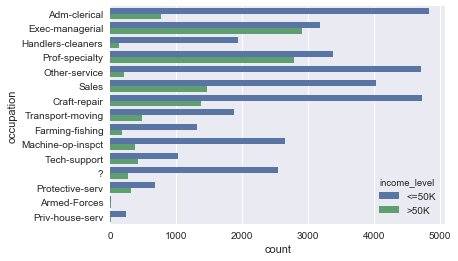

In [33]:
import seaborn as sns
sns.countplot(y='occupation', hue='income_level', data=data,)

In [34]:
#####################Importation des packages

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sn
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

#### Importation des données

In [35]:
#### On renomme les colonnes de notre table
columns = ['Age','Workclass','fnlgwt','Education','Education num','Marital Status',
           'Occupation','Relationship','Race','Sex','Capital Gain','Capital Loss',
           'Hours/Week','Native country','Income']

#### Importation de la table census et suppression de la première ligne
df = read_csv("census_income_dataset.csv", names = columns, skiprows = 1)

#df.drop(df.index[0])
#### Affichage des 5 première lignes
df.head(5)

,Age,Workclass,fnlgwt,Education,Education num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native country,Income
0,39,State-gov,77516.0,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


#### Data engineering

In [36]:
##### Modification des modalités de la variable cible par 0 ou 1
df['Income'] = df['Income'].apply(lambda x: 1 if x=='>50K' else 0)
#df['Income']

In [37]:
df.groupby(df["Income"]).size()#### Répartition des cibles

Income
0    37155
1    11687
dtype: int64

In [38]:
####################Enlever les valeurs manquantes
    
df.replace(' ?', np.nan, inplace=True)###Remplace les ? par des valeur manquantes NaN


#################### Encodage des variable catégoriel en entier

##### On join dans le même dataframe les données iniales et encodées
df = pd.concat([df, pd.get_dummies(df['Workclass'],prefix='Workclass',prefix_sep=':')], axis=1)
df.drop('Workclass',axis=1,inplace=True)#### On supprime la colonne "Workclass" catégorielle

#### Meme procéde pour toute les variables catégorielles

df = pd.concat([df, pd.get_dummies(df['Marital Status'],prefix='Marital Status',prefix_sep=':')], axis=1)
df.drop('Marital Status',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['Occupation'],prefix='Occupation',prefix_sep=':')], axis=1)
df.drop('Occupation',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['Relationship'],prefix='Relationship',prefix_sep=':')], axis=1)
df.drop('Relationship',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['Race'],prefix='Race',prefix_sep=':')], axis=1)
df.drop('Race',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['Sex'],prefix='Sex',prefix_sep=':')], axis=1)
df.drop('Sex',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['Native country'],prefix='Native country',prefix_sep=':')], axis=1)
df.drop('Native country',axis=1,inplace=True)

df.drop('Education', axis=1,inplace=True)


#### Affichage 
df.head()

,Age,fnlgwt,Education num,Capital Gain,Capital Loss,Hours/Week,Income,Workclass:?,Workclass:Federal-gov,Workclass:Local-gov,...,Native country:Portugal,Native country:Puerto-Rico,Native country:Scotland,Native country:South,Native country:Taiwan,Native country:Thailand,Native country:Trinadad&Tobago,Native country:United-States,Native country:Vietnam,Native country:Yugoslavia
0,39,77516.0,13,2174.0,0.0,40.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311.0,13,0.0,0.0,13.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646.0,9,0.0,0.0,40.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721.0,7,0.0,0.0,40.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409.0,13,0.0,0.0,40.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df.groupby(df["Income"]).size() #### Modalité de la variable "Income"

Income
0    37155
1    11687
dtype: int64

In [40]:
df.shape

(48842, 93)

In [41]:
df["Income_c"] = df["Income"]
df.drop("Income", 1, inplace = True)

In [42]:
df.shape

(48842, 93)

In [43]:
df.groupby(df["Income_c"]).size()

Income_c
0    37155
1    11687
dtype: int64

In [44]:
df.head(10)

,Age,fnlgwt,Education num,Capital Gain,Capital Loss,Hours/Week,Workclass:?,Workclass:Federal-gov,Workclass:Local-gov,Workclass:Never-worked,...,Native country:Puerto-Rico,Native country:Scotland,Native country:South,Native country:Taiwan,Native country:Thailand,Native country:Trinadad&Tobago,Native country:United-States,Native country:Vietnam,Native country:Yugoslavia,Income_c
0,39,77516.0,13,2174.0,0.0,40.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311.0,13,0.0,0.0,13.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646.0,9,0.0,0.0,40.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721.0,7,0.0,0.0,40.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409.0,13,0.0,0.0,40.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,37,284582.0,14,0.0,0.0,40.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,49,160187.0,5,0.0,0.0,16.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,52,209642.0,9,0.0,0.0,45.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
8,31,45781.0,14,14084.0,0.0,50.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
9,42,159449.0,13,5178.0,0.0,40.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


#### Création des jeux de train et de test

In [45]:
##### Création d'un jeu de test et de validation

from sklearn.model_selection import train_test_split

##### Séparation des jeux de train et de test

array = df.values
X = array[:, 0:92].astype(float) #### Variables prédictrices
Y = array[:, 92] #### Variable à prédire

validation_size = 0.20
seed = 7

#### Séparation des jeu de train et de test à proportion 80 - 20

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size = validation_size, random_state = seed)

In [46]:
Y[:10]#### Variable à predire!

array([0., 0., 0., 0., 0., 0., 0., 1., 1., 1.])

#### Modélisation

In [47]:
import numpy
from matplotlib  import pyplot
from pandas import read_csv 
from pandas import set_option
#from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report   
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.pipeline import Pipeline 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import ExtraTreesClassifier

In [48]:
#### Evaluer les algorithmes

num_folds = 10 #### Echantillon
seed = 7 
scoring = 'accuracy'

In [49]:
# Sélection des modèles

models = [] 
models.append(('RF', RandomForestClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis())) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB())) 

# models.append(('SVM', SVC()))

#### Résultats

In [50]:
results = [] 
names = [] 
for name, model in models: 
    #### K échantillons ici 10
    kfold = KFold(n_splits=num_folds, random_state=seed) 
    #### Lancement des modélisations sur les données d'entrainements X_train et Y_train
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring) 
    #### Alimentation de la liste result avec les prédictions
    results.append(cv_results) 
    #### Alimentation de la liste name
    names.append(name) 
    #### Résultats
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
    print(msg)
    #print(results)

RF: 0.848566 (0.005372)
LR: 0.800144 (0.006965)


C:\Users\aslim\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\aslim\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\aslim\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\aslim\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\aslim\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\aslim\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\aslim\Anacond

LDA: 0.842833 (0.006762)
KNN: 0.778594 (0.004627)
CART: 0.813401 (0.005005)
NB: 0.797405 (0.006610)


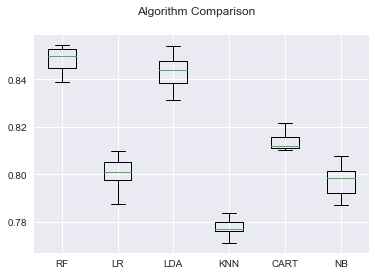

In [51]:
# Comparaison des algorithmes

fig = pyplot.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
pyplot.boxplot(results) 
ax.set_xticklabels(names) 
pyplot.show()